In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics as mt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import (LinearRegression, Ridge, RidgeCV, 
                                  Lasso, LassoCV, ElasticNet, ElasticNetCV)

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

In [2]:
data = pd.read_csv('data/04_USA_Housing.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [3]:
data.drop(columns='Address', inplace=True)
data.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

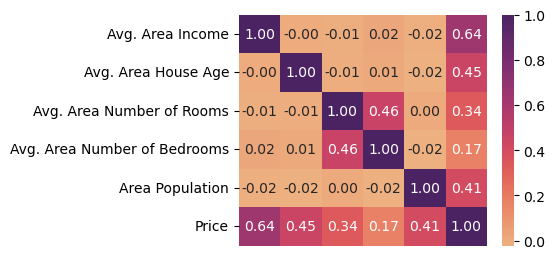

In [4]:
plt.figure(figsize=(4,3))
sns.heatmap(data.corr(), annot=True, 
            fmt='.2f', cmap='flare',  xticklabels=[])

plt.show()

In [5]:
y = data['Price']
X = data.drop(columns='Price')

In [6]:
X_vif = X.assign(const=1)
vif = pd.DataFrame()
vif['Variables'] = X.columns
vif['Values'] = [variance_inflation_factor(X_vif, i) for i in range(X.shape[1])]
display(vif)

,Variables,Values
0,Avg. Area Income,1.001159
1,Avg. Area House Age,1.000577
2,Avg. Area Number of Rooms,1.273535
3,Avg. Area Number of Bedrooms,1.274413
4,Area Population,1.001266


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
def _cv(_model):
    _score = cross_val_score(_model, X, y, cv=10)
    return _score.mean()

def _rmse_r2(_actuals, _predictions):
    _rmse = mt.root_mean_squared_error(_actuals, _predictions)
    _r2   = mt.r2_score(_actuals, _predictions)
    return _rmse, _r2

In [9]:
lambdas = 10**np.linspace(10, -2, 100)*0.5
# lambdas = 10**np.linspace(1, -4, 100)*0.5

best_alphas = {
    'RidgeCV': RidgeCV(alphas=lambdas, scoring='r2').fit(X_train, y_train).alpha_,
    'LassoCV': LassoCV(alphas=lambdas, cv=10,).fit(X_train, y_train).alpha_,
    'ElasticNetCV': ElasticNetCV(alphas=lambdas, cv=10).fit(X_train, y_train).alpha_    
}

models = {'Lineer': LinearRegression(),
          'Ridge': Ridge(alpha=0.1),
          'RidgeCV': Ridge(best_alphas['RidgeCV']),
          'Lasso': Lasso(alpha=0.1),
          'LassoCV': Lasso(best_alphas['LassoCV']),
          'ElasticNet': ElasticNet(alpha=0.1),
          'ElasticNetCV': ElasticNet(best_alphas['ElasticNetCV'])
}

results = pd.DataFrame()
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    rmse_r2 = _rmse_r2(y_test, predictions)
    cv = _cv(model)
    row = pd.DataFrame([name, rmse_r2[0], rmse_r2[1], cv]).T
    results = pd.concat([results, row])

results.columns = ['Model', 'RMSE', 'R2', 'CrossValidationScore']
results.set_index('Model', inplace=True)
pd.options.display.float_format='{:,.4f}'.format
display(results)

# print(best_alphas)

,RMSE,R2,CrossValidationScore
Model,,,
Lineer,"102,711.8381",0.9146,0.9174
Ridge,"102,711.8483",0.9146,0.9174
RidgeCV,"102,711.9226",0.9146,0.9174
Lasso,"102,711.8361",0.9146,0.9174
LassoCV,"102,711.8380",0.9146,0.9174
ElasticNet,"103,212.7379",0.9138,0.9165
ElasticNetCV,"102,714.1906",0.9146,0.9174


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>